# Introduction

Direct running a jupyter notebook on CRC server with X11 is extremely slow. 

Fast X is a possible option to run jupyter notebook. But personally I don't like it because Linux OS looks very ugly for me and it seems to be still lagging expecially when I navigate a large jupyter notebook.

Alternative option is running jupyter notebook inside my laptop and communicate with server whenever I run a code.

# Requirment

- Jupyter notebook on your CRC account
- University VPN (Cisco anyconnect) on your local machine
- X11 for ase view
    - XQuarz for Mac OS
    - MobaXterm or X11 supported SSH program for Windows

# Set-up

## Generate notebook configuration file

Log in your CRC accout in the termina and generate A notebook configuration file.

$ jupyter notebook --generate-config

This command will create the jupyter folder and create notebook configuration file,

"jupyter_notebook_config.py"

in "/home/.jupyter" folder.

## Password setup

Whenever you connect jupyter, you may need to enter your access token. I recommend you setting up your own notebook password. 

type "python" in your terminal and ...

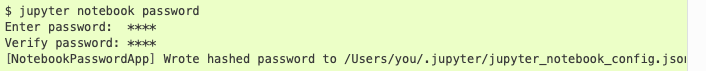

jupyter notebook password will prompt you for your password and record the hashed password in your jupyter_notebook_config.json.

## Edit configuration file 

Edit "jupyter_notebook_config.py" in "~/.jupyter folder".

Uncomment and edit in jupyter_notebook_config.py is the following

In [ ]:
## The IP address the notebook server will listen on.
c.NotebookApp.ip = '0.0.0.0'   # if you fail to connect to the remote server, c.NotebookApp.ip = '*'

## Whether to open in a browser after starting. The specific browser used is
#  platform dependent and determined by the python standard library `webbrowser`
#  module, unless it is overridden using the --browser (NotebookApp.browser)
#  configuration option.
c.NotebookApp.open_browser = False

## The port the notebook server will listen on.
c.NotebookApp.port = 8905      # use whatever port number you want. 
                               # if you fail to connect to the remote server, try another port number

Everything is done. Let's test!

# Run remote jupyter notebook in your local machine

## Run Jupyter notebook from remote machine
In your CRC terminal, type "jupyter notebook &"

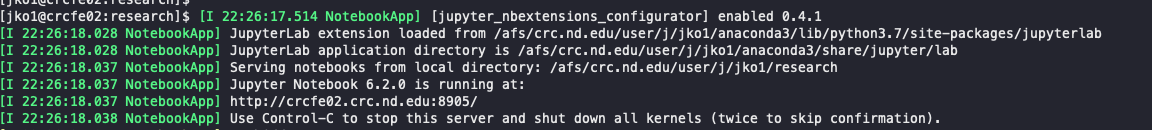

Now the remote note book is running at the port "8905"

## Forward port (remote server port) to (localhost port)
 
You need to forward "8905" port (remote) to port of your local machine. 

open a new terminal in your local machine (NOT CRC) and write the following command.

"ssh -N -f -L localhost:(local machine port):localhost:(remote machine port) yourid@crcfe02.crc.nd.edu"

In my case, I just use the same port number for local and remote machines. Thus,

"ssh -N -f -L localhost:8905:localhost:8905 yourid@crcfe02.crc.nd.edu" 

* What are -N, -f, -L ?
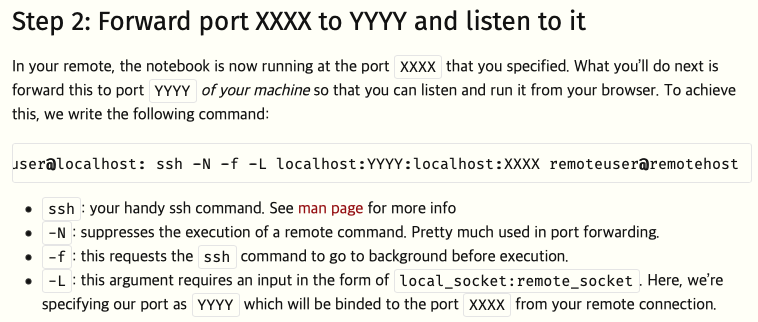
(https://ljvmiranda921.github.io/notebook/2018/01/31/running-a-jupyter-notebook/)

##  all you need is open your favorite browser

Open your web brower and type "localhost:(your port)" 

# Test ASE

In [12]:
from ase import Atoms,Atom
from ase.io import read,write
from ase.calculators.vasp import Vasp
from utils import que, job_status
import os

# set job environemtns. It edits run_vasp.py
que('/afs/crc.nd.edu/user/j/jko1/research/run_vasp.py',   # location of run_vasp.py
    "q = '*@@debug_d12chas' ",      #  node. '*@@debug_d12chas', 'long@@crc_d12chas', '*@@schneider_d24cepyc'
    "pe = 'smp 12'              ")  # smp, mpi, numer of cores 

# build a water molecule
atoms = Atoms([Atom('H', [0.5960812, -0.7677068, 0.000]),
               Atom('O', [0.00000, 0.00000, 0.00000]),
               Atom('H', [0.5960812, 0.76776068, 0.00000])],
               cell = (8,8,8),
             pbc = [1,1,1])
atoms.center()

directory = 'h2o'

calc = Vasp(directory = directory,
            encut=400,
            xc='pbe',
            ismear = 0,
            ibrion =1,
            ediff = 1e-4,
            ncore =64,
            ediffg = -0.03,
            nsw = 500)

# submit a job and look at job status 
atoms, te = job_status(directory, calc, atoms, print_energy = True, print_all_status =True)

h2o  :  215712  was finished   |  TE = -14.22667691


In [13]:
view(atoms)

Unfortunately, it would be impossible to make ase-view faster. It is real-time communication between CRC and your machine. I just download a CONTCAR file and visualize it via another SFTP software (Firezila, Forklift, etc) if necessary.

# Miscellaneous

* Recommended extensions for Jupyter notebook

    type "pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install" in the terminal for installation


    * AutoSaveTime: Optionally set the notebook autosave interval, and/or add a selector to the toolbar to set it
    * Collapsible Headings: Allows notebook to have collapsible sections, separated by headings
    * Codefolding: This extension enables the CodeMirror feature to allow codefolding in code cells
    * ExecuteTime: Display when each cell has been executed and how long it took

* my personal codes in the utils.py
    * que: edit nodes and cores in the jupyter cell
    * job_status: submit a job and see job status. get ase atoms object and total energy after calculation is done


* Reference

    * https://ljvmiranda921.github.io/notebook/2018/01/31/running-a-jupyter-notebook/
    * https://jupyter-notebook.readthedocs.io/en/stable/public_server.html#automatic-password-setup
    * and random blogs..